In [13]:
from datetime import datetime, date
import talib as ta
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pandas_datareader as web
from scipy import stats
import sklearn.metrics
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

Sonny Holman
Finland
HAMK
Entrepreneur

Remember to run the above code as well to enable the imports. TALIB is required to use this code.

Run the notebook below, enter the stock ticker symbol in the console that appears and press enter.

In [3]:
stock = input("Enter a stock ticker.")
userDate = input("Enter a starting date.")

data = web.DataReader(stock, data_source = "stooq", start = userDate, end = date.today())

#converts Date index into a dataframe column.

dates = []
for x in range(len(data)):
    newdate = str(data.index[x])
    newdate = newdate[0:10]
    dates.append(newdate)
    
data['Date'] = dates

data

,Open,High,Low,Close,Volume,Date
Date,,,,,,
2023-02-17,152.3500,153.0000,150.8500,152.5500,5.914412e+07,2023-02-17
2023-02-16,153.5100,156.3300,153.3475,153.7100,6.816794e+07,2023-02-16
2023-02-15,153.1100,155.5000,152.8800,155.3300,6.566925e+07,2023-02-15
2023-02-14,152.1200,153.7700,150.8600,153.2000,6.170757e+07,2023-02-14
2023-02-13,150.9520,154.2600,150.9200,153.8500,6.219901e+07,2023-02-13
...,...,...,...,...,...,...
2019-01-08,36.0899,36.6342,35.8367,36.3711,1.700222e+08,2019-01-08
2019-01-07,35.8786,35.9104,35.2046,35.6911,2.270168e+08,2019-01-07
2019-01-04,34.8746,35.8446,34.6991,35.7729,2.428866e+08,2019-01-04


Pairplot

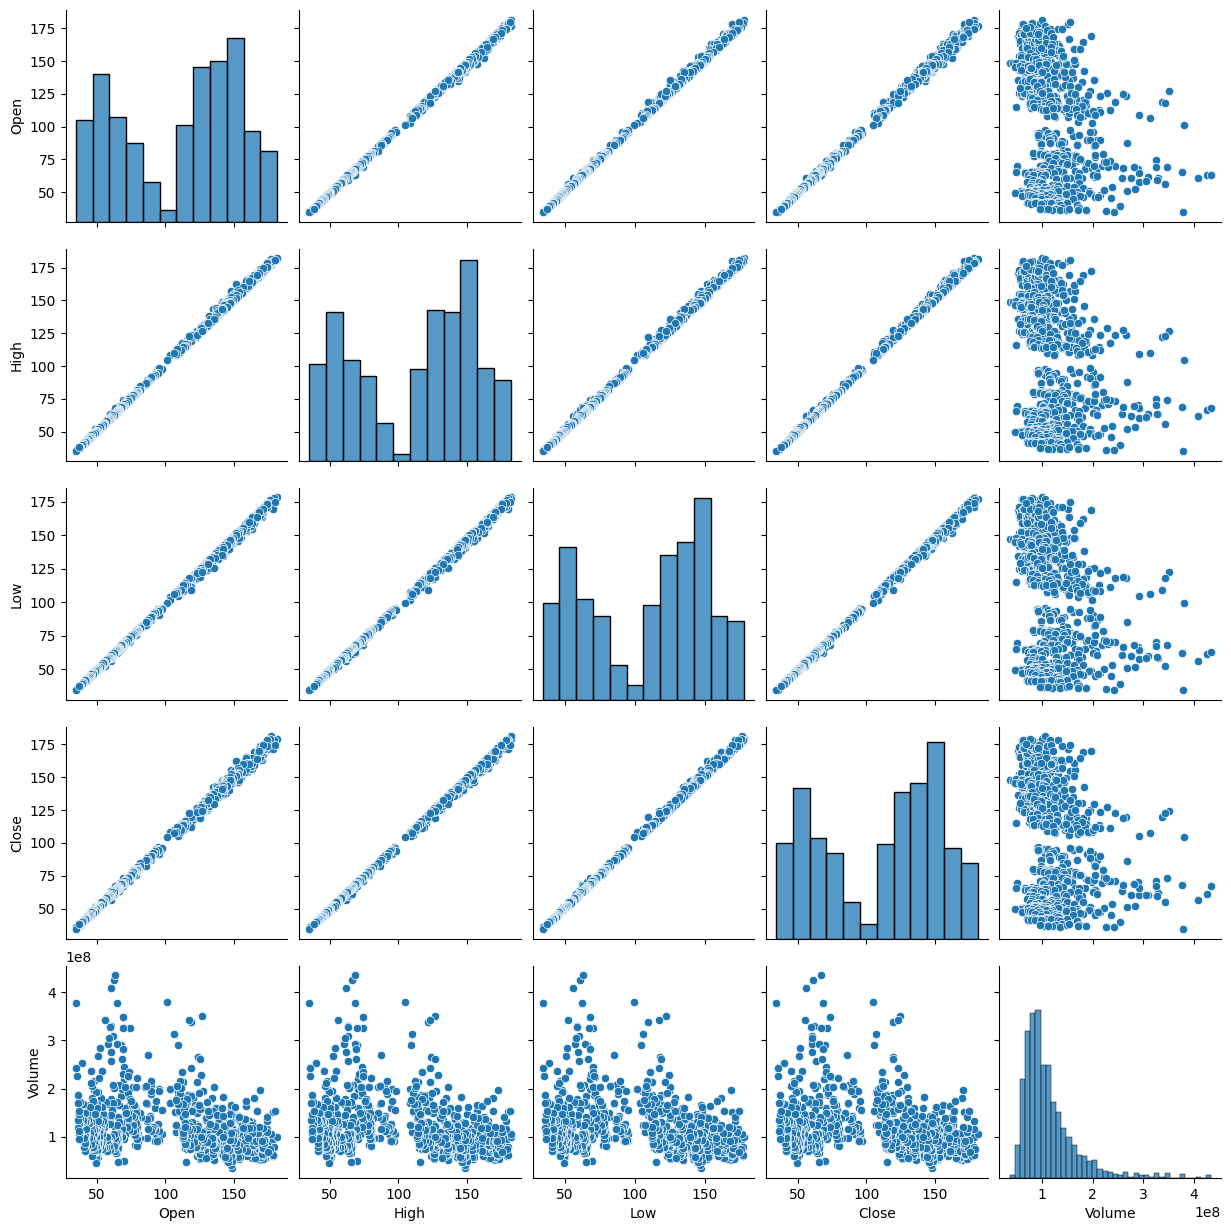

In [4]:
sns.pairplot(data)

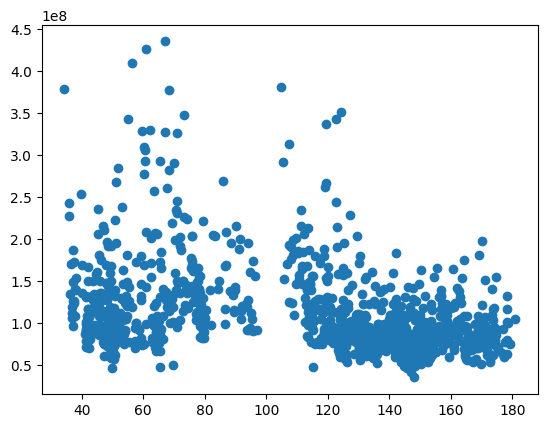

In [12]:
v = data['Close']
z = data['Volume']

plt.scatter(v,z)

In [14]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(data[['Close','Volume']])
y_predicted

array([0, 0, 0, ..., 1, 1, 2])

In [15]:
data['cluster']=y_predicted
data.head()

,Open,High,Low,Close,Volume,Date,RSI,EMA_50,SMA_100,cluster
Date,,,,,,,,,,
2023-02-17,152.350,153.00,150.8500,152.55,59144118.0,2023-02-17,NaN,NaN,NaN,0
2023-02-16,153.510,156.33,153.3475,153.71,68167942.0,2023-02-16,NaN,NaN,NaN,0
2023-02-15,153.110,155.50,152.8800,155.33,65669252.0,2023-02-15,NaN,NaN,NaN,0
2023-02-14,152.120,153.77,150.8600,153.20,61707573.0,2023-02-14,NaN,NaN,NaN,0
2023-02-13,150.952,154.26,150.9200,153.85,62199013.0,2023-02-13,NaN,NaN,NaN,0


In [16]:
km.cluster_centers_

array([[1.19771487e+02, 8.58326899e+07],
       [7.58652756e+01, 3.01055258e+08],
       [9.19834384e+01, 1.54959754e+08]])

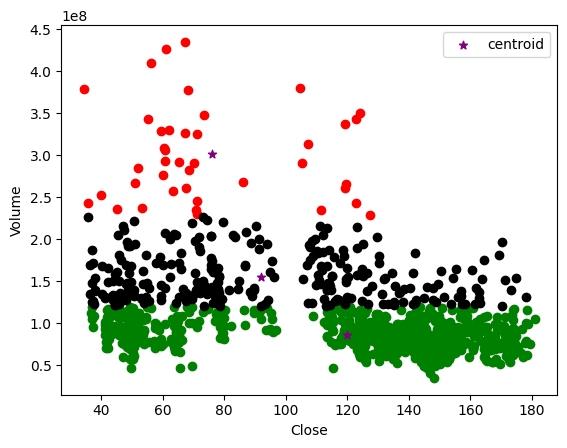

In [19]:
df1 = data[data.cluster==0]
df2 = data[data.cluster==1]
df3 = data[data.cluster==2]
plt.scatter(df1.Close,df1['Volume'],color='green')
plt.scatter(df2.Close,df2['Volume'],color='red')
plt.scatter(df3.Close,df3['Volume'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Close')
plt.ylabel('Volume')
plt.legend()

In [20]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters = k)
    km.fit(data[['Close','Volume']])
    sse.append(km.inertia_)

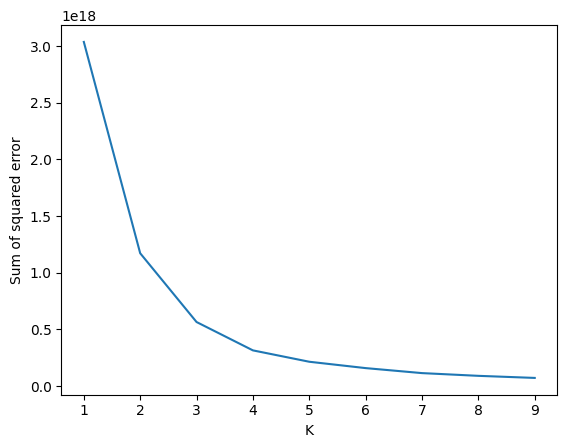

In [21]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

Basic Chart & Preferred Indicator

Indicators Avaiable:

RSI
EMA
SMA
MACD
VWAP

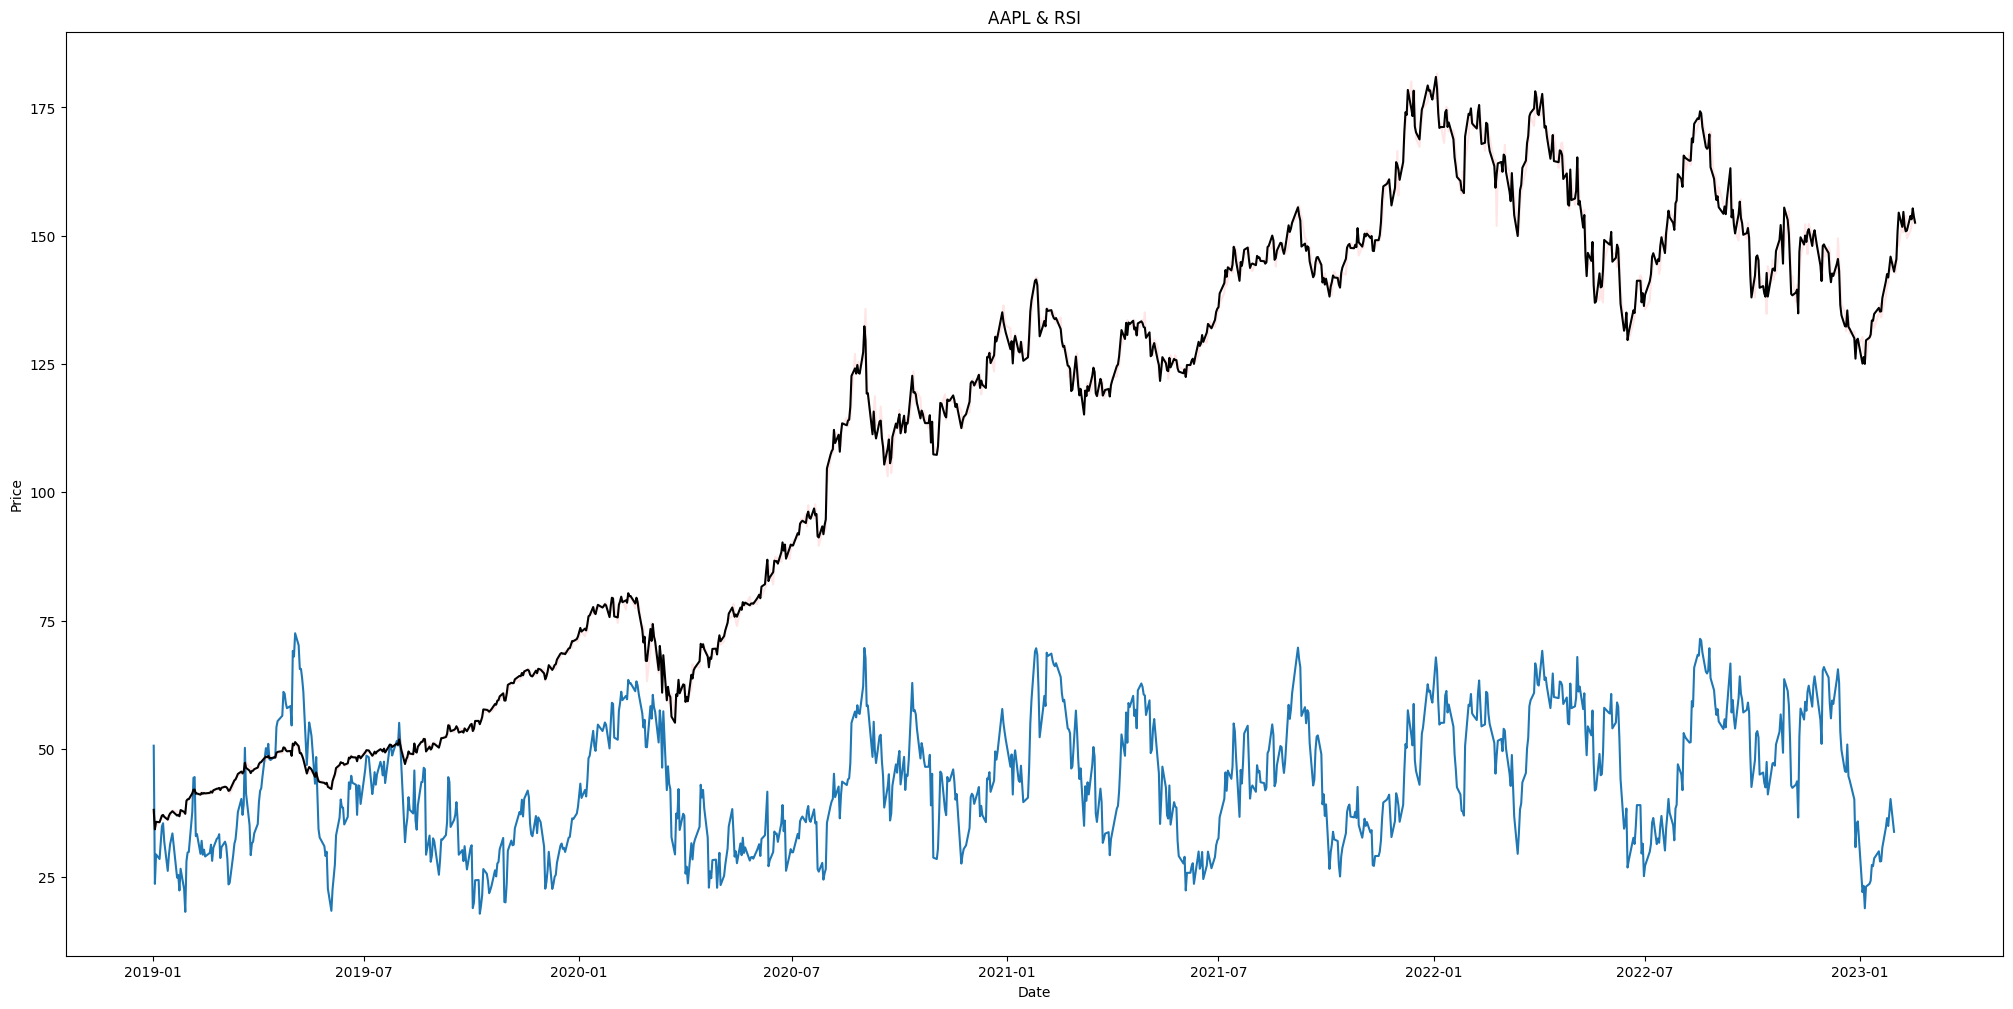

In [5]:
indicator = (input("Enter your preferred indicator."))

indicatortype = ""

#RSI
data['RSI'] = ta.RSI(data['Close'], 14)

#EMA
data['EMA_50'] = ta.EMA(data['Close'], 50)

#SMA_100
data['SMA_100'] = ta.SMA(data['Close'], 100)

#MACD
#data['MACD'] = ta.MACD(data['Close'], 12, 26, 9)

#VWAP
#data['VWAP'] = ta.VWAP(data['Close'])



def displaychart():
    plt.figure(figsize = (25, 12))
    plt.title(stock + " & " + indicator), 
    plt.xlabel('Date'),
    plt.ylabel('Price'),
    
    #replaces "" with '', this could be fixed or another alternative solution.
    final_indicatortype = indicatortype[0].replace("", '')
    
    plt.plot(data[str(final_indicatortype)], label = indicatortype)
    plt.plot(data['Open'], color = 'red', alpha = 0.1)
    plt.plot(data['Close'], color = 'black')
    plt.show()
    
    
if indicator == 'RSI':
        
    indicatortype = "RSI",
    displaychart()
        
if indicator == 'EMA':
        
    indicatortype = "EMA_50",
    displaychart()
        
if indicator == 'SMA':
        
    indicatortype = "SMA_100",
    displaychart()
        
if indicator == 'MACD':
        
    indicatortype = "MACD",
    displaychart()
        
if indicator == 'VWAP':
        
    indicatortype = 'VWAP',
    displaychart()

In [6]:
#Correlation
print(".Corr values of " + stock)
data.corr()

.Corr values of AAPL


C:\Users\sonny\AppData\Local\Temp\ipykernel_9740\1162256481.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Open,High,Low,Close,Volume,RSI,EMA_50,SMA_100
Open,1.000000,0.999602,0.999518,0.998949,-0.353231,0.449476,0.986423,0.969574
High,0.999602,1.000000,0.999453,0.999515,-0.345208,0.450536,0.986881,0.970049
Low,0.999518,0.999453,1.000000,0.999529,-0.363509,0.447782,0.987082,0.969997
Close,0.998949,0.999515,0.999529,1.000000,-0.354801,0.450151,0.987203,0.970126
Volume,-0.353231,-0.345208,-0.363509,-0.354801,1.000000,-0.048208,-0.337070,-0.301917
RSI,0.449476,0.450536,0.447782,0.450151,-0.048208,1.000000,0.344195,0.296022
EMA_50,0.986423,0.986881,0.987082,0.987203,-0.337070,0.344195,1.000000,0.992520
SMA_100,0.969574,0.970049,0.969997,0.970126,-0.301917,0.296022,0.992520,1.000000


Linear Regression Based Prediction

Dependent Variable = Adjusted Closing Price

Independent Variable = Opening Price

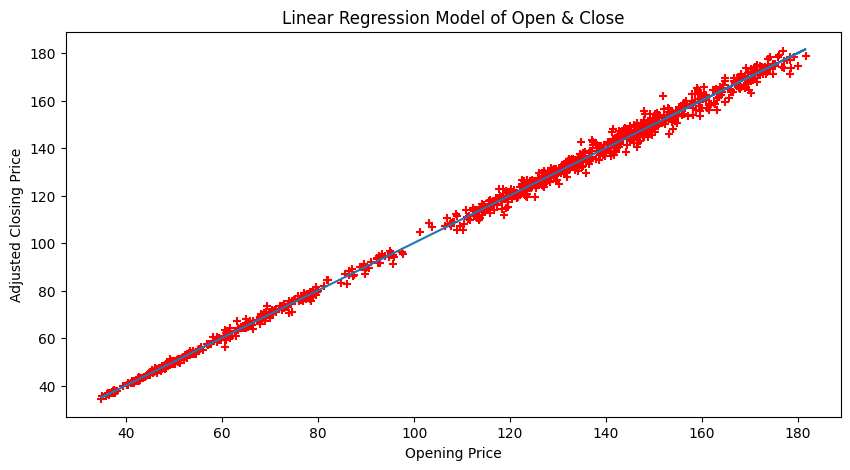

In [7]:
#Linear Regression model of Adjusted Closing Price & The Opening Price.
x = data['Open']
y = data['Close']

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
    return slope * x + intercept

model = list(map(myfunc, x))

plt.figure(figsize = (10, 5))
plt.title('Linear Regression Model of Open & Close')
plt.xlabel("Opening Price")
plt.ylabel("Adjusted Closing Price")
 
plt.scatter(x, y, color = 'red', marker ='+')
plt.plot(x, model)
plt.show()


Relationship (R)

In [8]:
print(r)

0.9989494992802362


Independent Variable = Volume

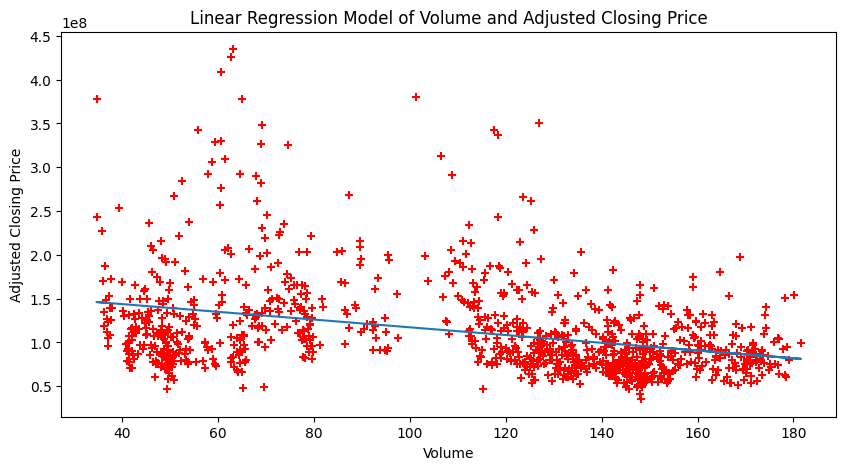

In [9]:
#Linear Regression model of Adjusted Closing Price & The Volume.
x1 = data['Open']
y1 = data['Volume']

slope, intercept, r1, p, std_err = stats.linregress(x1, y1)

def myfunc(x1):
    return slope * x1 + intercept

model = list(map(myfunc, x1))

plt.figure(figsize = (10, 5))
plt.title('Linear Regression Model of Volume and Adjusted Closing Price')
plt.xlabel("Volume")
plt.ylabel("Adjusted Closing Price")
 
plt.scatter(x1, y1, color = 'red', marker ='+')
plt.plot(x1, model)
plt.show()

In [10]:
#This r value indicates a weak relationship
print(r1)

-0.35323129401094605


Prediction of next day opening price.

In [11]:
slope, intercept, r, p, std_err = stats.linregress(x, y)

def mypredict(x):
    return slope * x + intercept

prediction = mypredict(data['Close'][1])

print("Predicted Next Day Opening Price:")
print(prediction)

print("Previous Adjusted Closing Price:")
print(data['Close'][1])

Predicted Next Day Opening Price:
153.77758049262246
Previous Adjusted Closing Price:
153.71
